<a href="https://colab.research.google.com/github/claarr/PCVK_Ganjil_2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nama : Clarita Putri Anggraeni
# Kelas : TI-3G
# NIM : 2141720213

## Jobsheet 5

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

### 1. Buat Gamma Correction

 Gamma Correction pada citra 
Masukkan nilai Gamma: 3


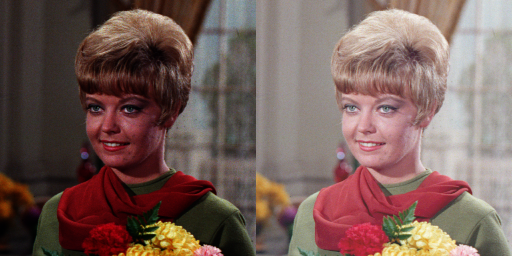

In [3]:
print(' Gamma Correction pada citra ')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Kuliah/SEMESTER 5/PCVK/Images/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(255 * pow  (original[y,x,c] / 255, (1 / gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

### Buat Simulasi Image Depth

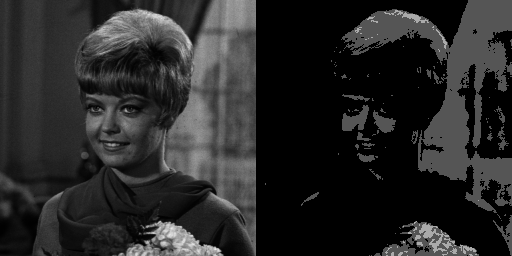

In [4]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)

original = cv.imread('/content/drive/MyDrive/Kuliah/SEMESTER 5/PCVK/Images/female.tiff', cv.IMREAD_GRAYSCALE)

depth_image = np.zeros(original.shape, original.dtype)
for i in range(original.shape[0]):
    for j in range(original.shape[1]):
        depth_image[i, j] = int(original[i, j] / level) * level

final_frame = cv.hconcat((original, depth_image))
cv2_imshow(final_frame)

### Buat Modul Average Denoising

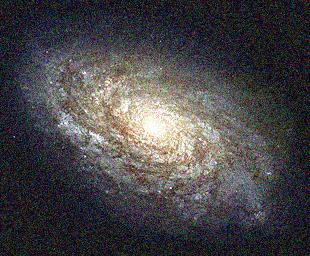

In [5]:
import glob

cv_img = []
for img in glob.glob('/content/drive/MyDrive/Kuliah/SEMESTER 5/PCVK/Images/noises/*.jpg'):
  n= cv.imread(img)
  cv_img.append(n)

dst = cv.fastNlMeansDenoisingColoredMulti(cv_img, 99, 1)
cv2_imshow(n)

In [6]:
import math

def PSNR(img,amount):
  first_image = img[0]
  for x in range(1,amount):
    if(x==0):
      continue
    first_image = first_image - img[x]
    #print(x)
  mse = np.mean((first_image) ** amount)
  if(mse == 0):
    return 100
  max_pixel = 255.0
  psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
  return psnr

print('PSNR')
print('------------------------------')
try:
  averageCitra = int(input('Masukan jumlah citra average: '))
except ValueError:
  print('Error, not a number')
result = PSNR(cv_img,averageCitra)
print('Nilai PSNR: ')
print(result)

PSNR
------------------------------
Masukan jumlah citra average: 5
Nilai PSNR: 
28.347387881857415


Nilai PSNR adalah 27.535900106778726 (dB)


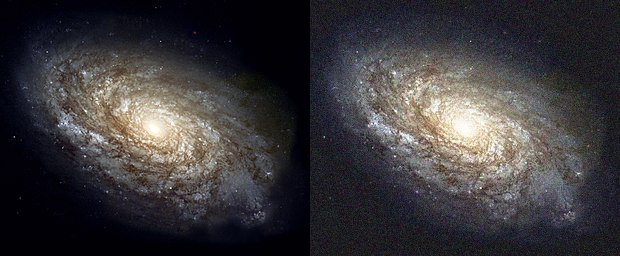

In [7]:
import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/Kuliah/SEMESTER 5/PCVK/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Kuliah/SEMESTER 5/PCVK/Images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 4 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal.
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

#### - Hasil PSNR dengan Jumlah Citra Average = 5


Nilai PSNR adalah 27.540343596413287 (dB)


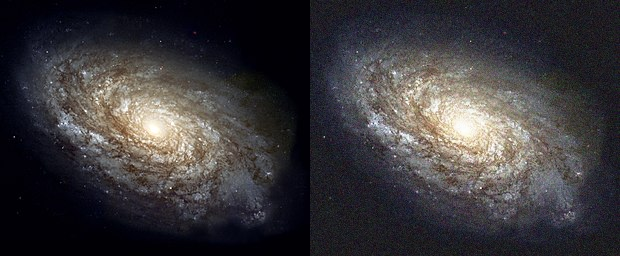

In [8]:
dst = cv_img[0]
noise_number = 5
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)


#### - Hasil PSNR dengan Jumlah Citra Average = 10

Nilai PSNR adalah 27.565419829489734 (dB)


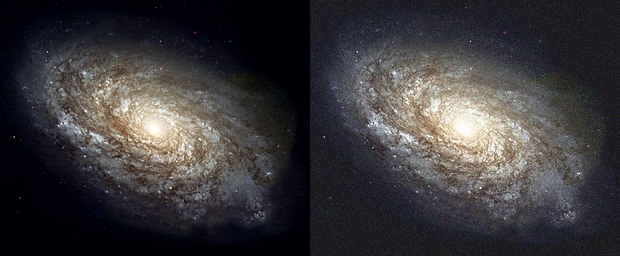

In [9]:
dst = cv_img[0]
noise_number = 10
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

#### - Hasil PSNR dengan Jumlah Citra Average = 20

Nilai PSNR adalah 27.538222898610954 (dB)


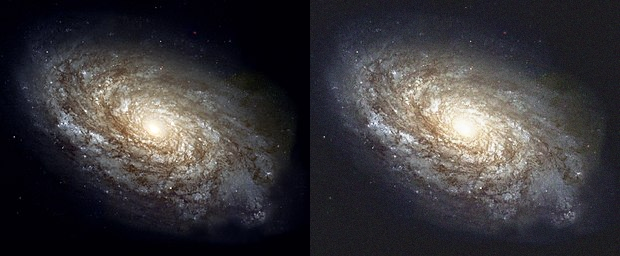

In [10]:
dst = cv_img[0]
noise_number = 20
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

#### - Hasil PSNR dengan Jumlah Citra Average = 40

Nilai PSNR adalah 27.50926339599344 (dB)


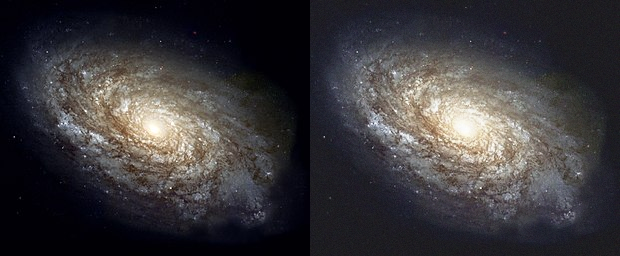

In [11]:
dst = cv_img[0]
noise_number = 40
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

#### - Hasil PSNR dengan Jumlah Citra Average = 80

Nilai PSNR adalah 27.505591702200206 (dB)


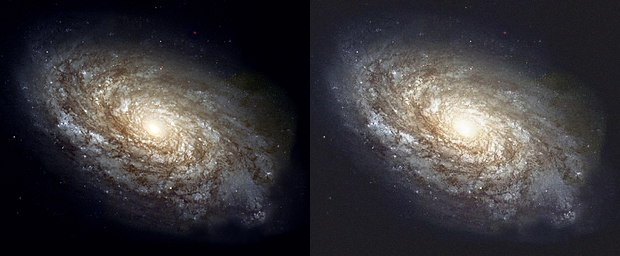

In [12]:
dst = cv_img[0]
noise_number = 80
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

#### - Hasil PSNR dengan Jumlah Citra Average = 100

Nilai PSNR adalah 27.507788340526822 (dB)


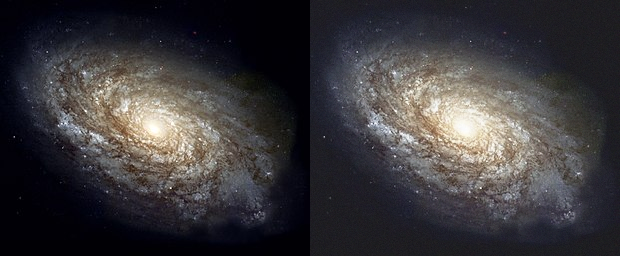

In [13]:
dst = cv_img[0]
noise_number = 100
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Dari hasil PSNR di atas, kesimpulan yang dapat diambil adalah hasil PSNR akan semakin besar jika noise number bertambah besar

### 4. Buat Image Masking

*   Operator AND



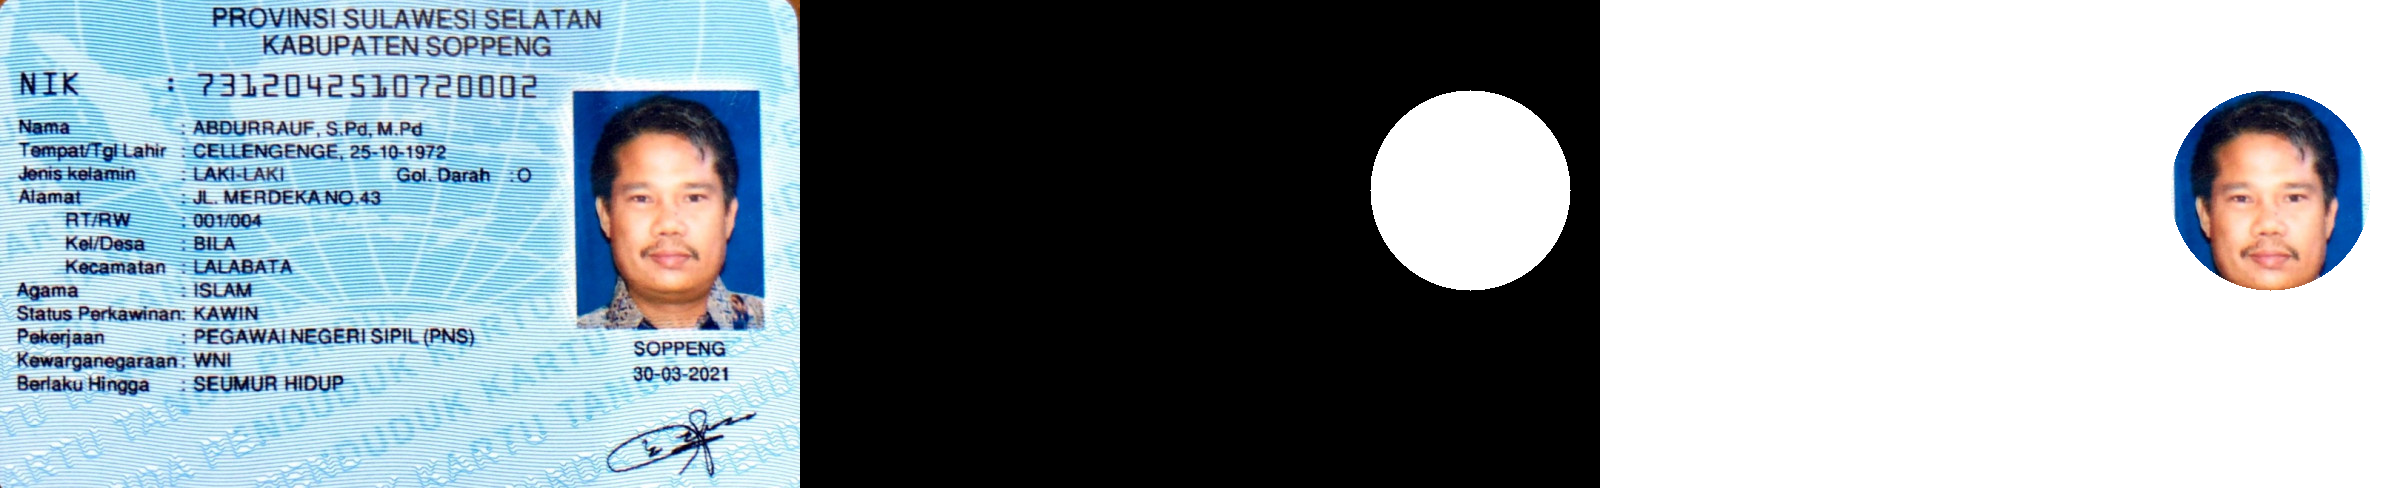

In [14]:
img = cv.imread('/content/drive/MyDrive/Kuliah/SEMESTER 5/PCVK/Images/KTP.jpeg')
mask = np.zeros(img.shape,dtype=np.uint8)
mask = cv.circle(mask, (670,190), 100, (255,255,255), -1)

result = cv.bitwise_and(img, mask)
result[mask==0] = 255

final_frame = cv.hconcat((img,mask,result))
cv2_imshow(final_frame)

*   Operator OR



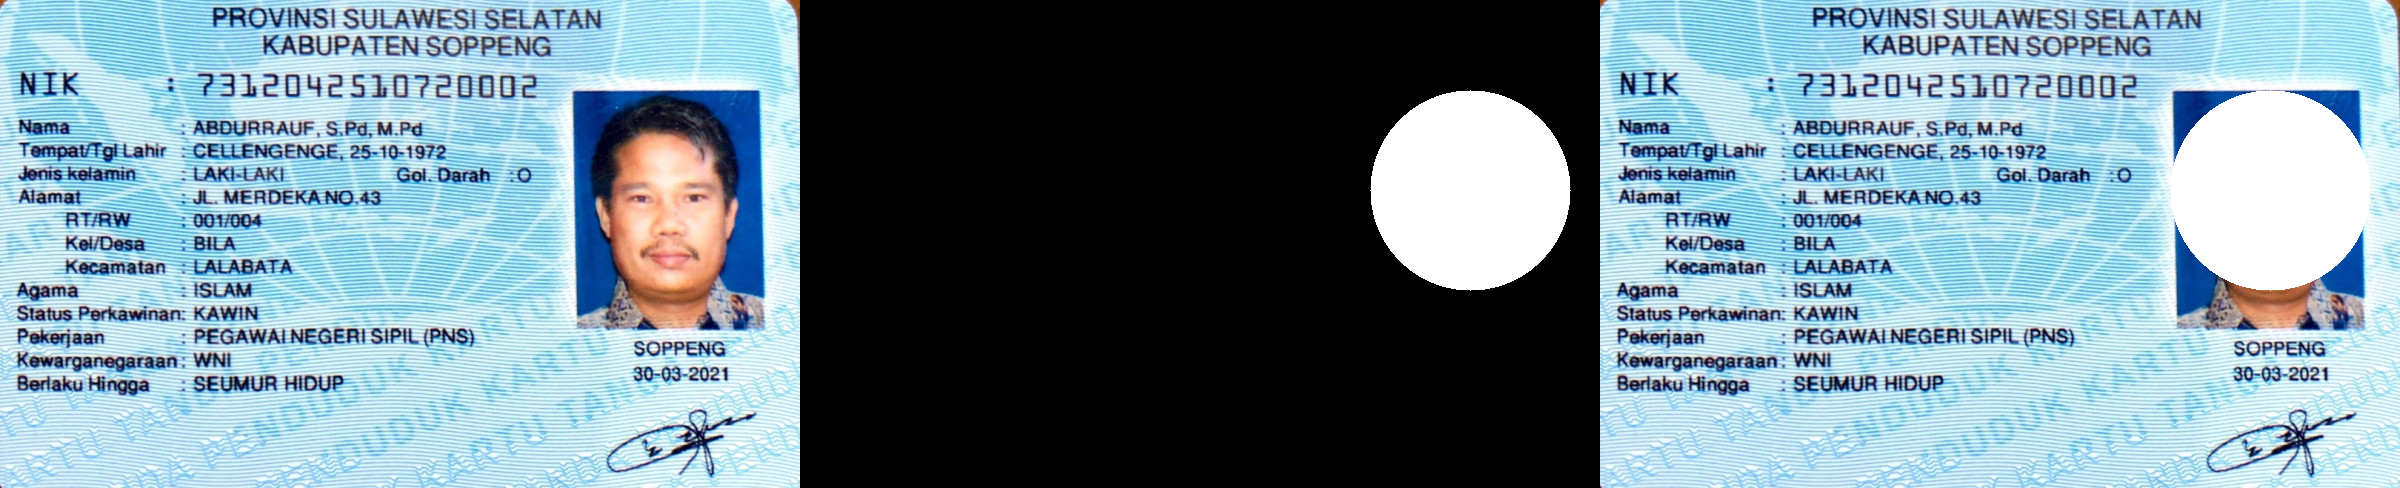

In [15]:
img = cv.imread('/content/drive/MyDrive/Kuliah/SEMESTER 5/PCVK/Images/KTP.jpeg')
mask = np.zeros(img.shape,dtype=np.uint8)
mask = cv.circle(mask, (670,190), 100, (255,255,255), -1)

masked = cv.bitwise_or(img, mask)

final_frame = cv.hconcat((img, mask, masked))
cv2_imshow(final_frame)

*   Operator NOT



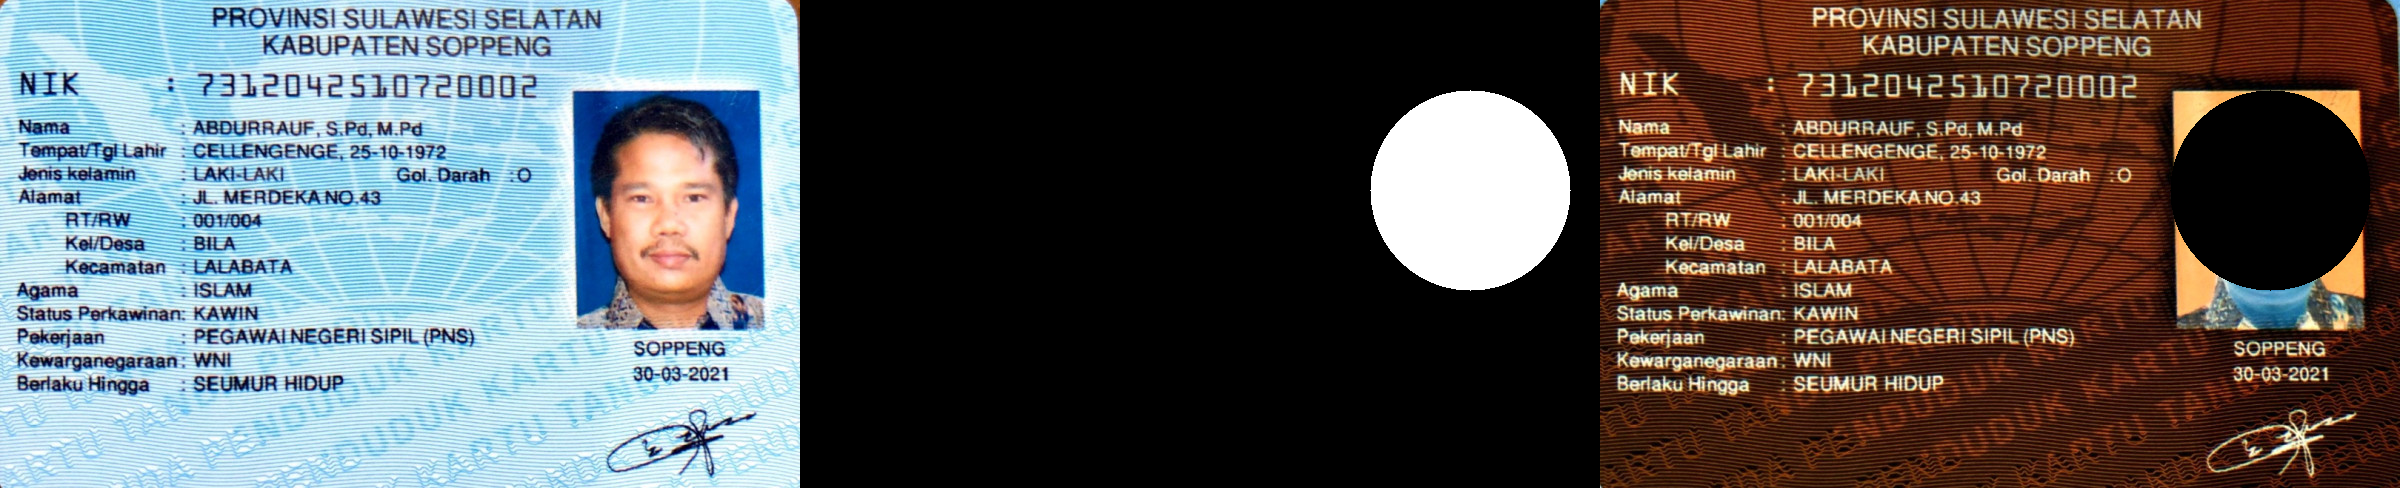

In [16]:
img = cv.imread('/content/drive/MyDrive/Kuliah/SEMESTER 5/PCVK/Images/KTP.jpeg')
mask = np.zeros(img.shape,dtype=np.uint8)
mask = cv.circle(mask, (670,190), 100, (255,255,255), -1)

masked = ~img & ~mask

final_frame = cv.hconcat((img, mask, masked))
cv2_imshow(final_frame)

*   Operator NAND



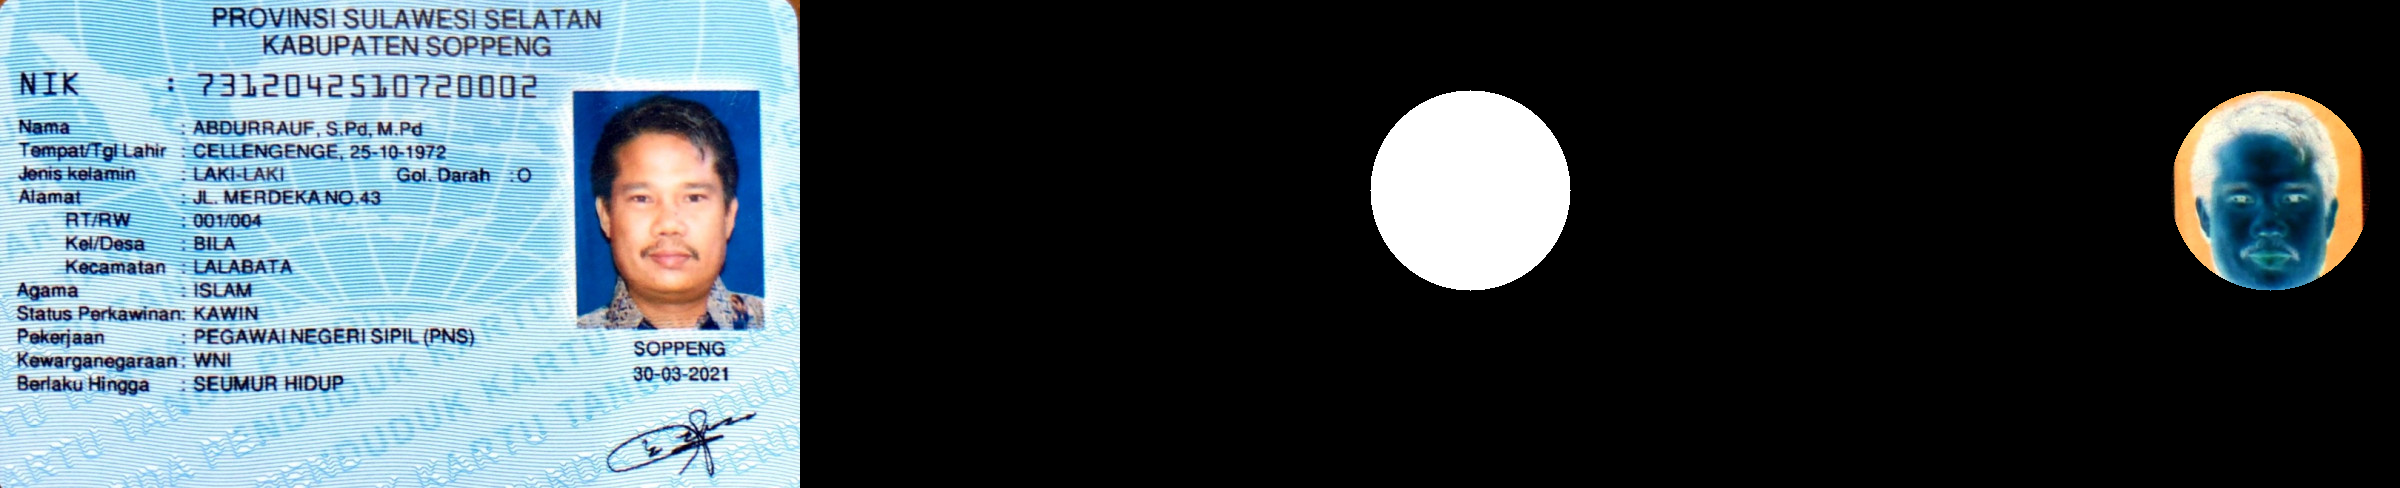

In [17]:
img = cv.imread('/content/drive/MyDrive/Kuliah/SEMESTER 5/PCVK/Images/KTP.jpeg')
mask = np.zeros(img.shape,dtype=np.uint8)
mask = cv.circle(mask, (670,190), 100, (255,255,255), -1)

masked = ~img & mask

final_frame = cv.hconcat((img, mask, masked))
cv2_imshow(final_frame)

*   Operator XOR



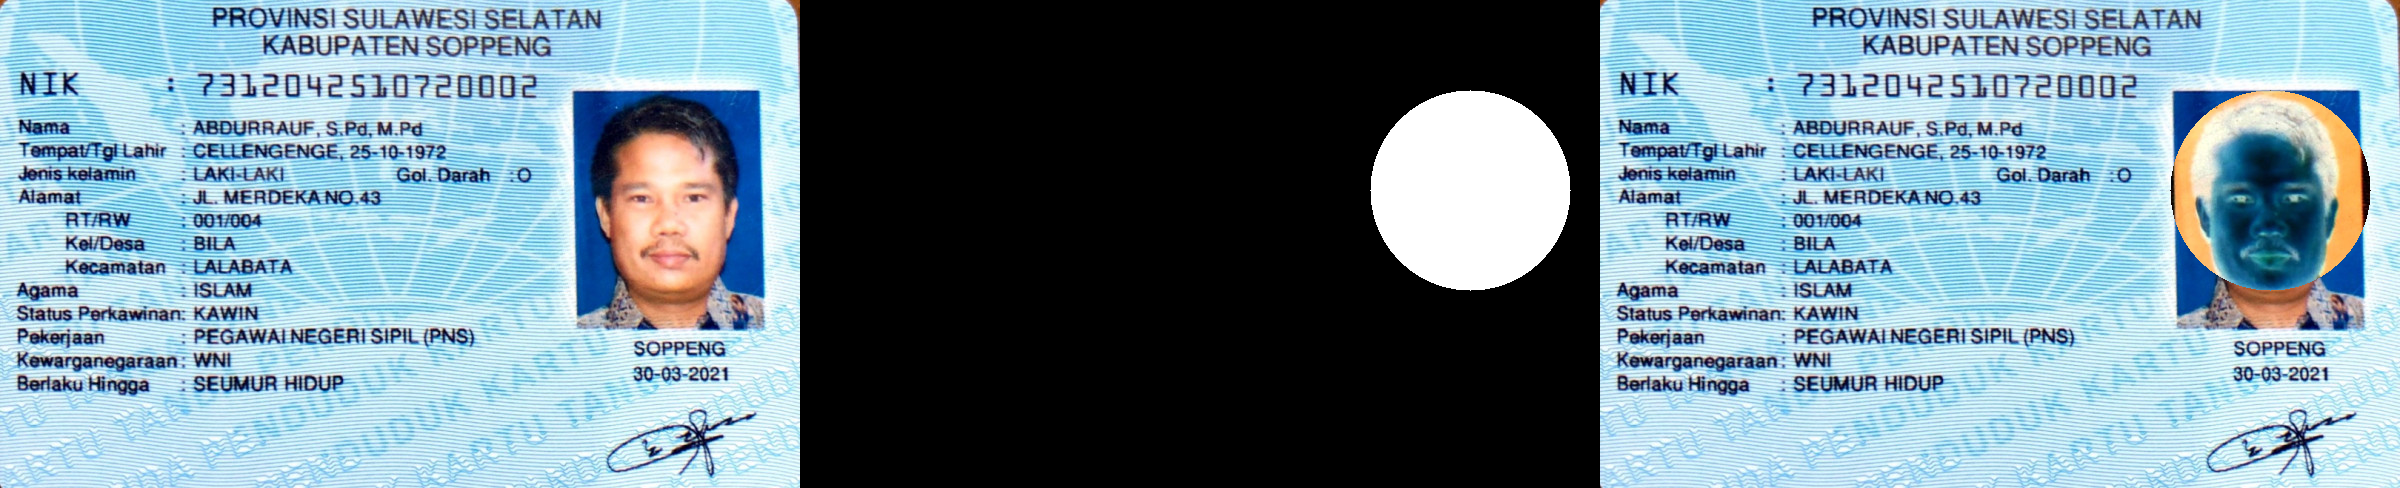

In [18]:
img = cv.imread('/content/drive/MyDrive/Kuliah/SEMESTER 5/PCVK/Images/KTP.jpeg')
mask = np.zeros(img.shape,dtype=np.uint8)
mask = cv.circle(mask, (670,190), 100, (255,255,255), -1)

masked = cv.bitwise_xor(img, mask)

final_frame = cv.hconcat((img, mask, masked))
cv2_imshow(final_frame)

Hasil Analisa :
1. **OR (Atau)**: Operator OR digunakan untuk menggabungkan dua citra atau piksel dalam citra. Hasilnya adalah citra yang akan lebih terang daripada citra asli jika salah satu dari kedua piksel tersebut terang.

2. **AND (Dan)**: Operator AND digunakan untuk menggabungkan dua citra atau piksel dalam citra. Hasilnya adalah citra yang akan lebih gelap daripada citra asli hanya jika kedua piksel tersebut gelap.

3. **NOT (Bukan)**: Operator NOT digunakan untuk mengubah piksel dalam citra dari gelap menjadi terang, atau sebaliknya. Ini adalah operasi inversi yang dapat digunakan untuk menghasilkan efek negatif pada citra.

4. **NAND (AND Tidak)**: Operator NAND adalah kombinasi dari operator AND dan NOT. Ini menghasilkan citra yang lebih gelap jika kedua piksel adalah terang, dan citra yang lebih terang jika salah satu atau keduanya gelap.

5. **XOR (Eksklusif Atau)**: Operator XOR menghasilkan citra yang lebih terang jika hanya satu dari dua piksel adalah terang, sedangkan jika keduanya terang atau keduanya gelap, hasilnya akan lebih gelap.